In [24]:
#Import all necessary packages
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#### Read in the credit ratings data from Compustat

In [25]:
credit_ratings = pd.read_csv('Credit_Ratings_Big.csv')
credit_ratings.head()

,gvkey,splticrm,datadate,spcsrc,conm,tic
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR


In [26]:
credit_ratings = credit_ratings.rename(columns={'tic': 'TICKER'})
credit_ratings.head()

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR


#### Check to see how many companies are missing a credit rating and drop them


In [27]:
credit_ratings.splticrm.isnull().value_counts()

False    269746
True      41995
Name: splticrm, dtype: int64

In [28]:
credit_ratings['splticrm'] = credit_ratings['splticrm'].fillna(credit_ratings['spcsrc'])

In [29]:
credit_ratings.splticrm.isnull().value_counts()

False    306496
True       5245
Name: splticrm, dtype: int64

In [30]:
credit_ratings = credit_ratings.dropna(subset=['splticrm', "TICKER"])
credit_ratings

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR
...,...,...,...,...,...,...
311736,316056,BBB-,10/31/2016,NaN,ALLEGION PLC,ALLE
311737,316056,BBB-,11/30/2016,NaN,ALLEGION PLC,ALLE
311738,316056,BBB-,12/31/2016,NaN,ALLEGION PLC,ALLE
311739,316056,BBB-,01/31/2017,NaN,ALLEGION PLC,ALLE


In [31]:
credit_ratings.splticrm.isnull().value_counts()

False    306236
Name: splticrm, dtype: int64

In [32]:
credit_ratings.drop_duplicates()

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR
...,...,...,...,...,...,...
311736,316056,BBB-,10/31/2016,NaN,ALLEGION PLC,ALLE
311737,316056,BBB-,11/30/2016,NaN,ALLEGION PLC,ALLE
311738,316056,BBB-,12/31/2016,NaN,ALLEGION PLC,ALLE
311739,316056,BBB-,01/31/2017,NaN,ALLEGION PLC,ALLE


In [33]:
credit_ratings[(credit_ratings["datadate"] == "01/31/2014") & (credit_ratings["gvkey"] == 1045)]

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
374,1045,B,01/31/2014,C,AMERICAN AIRLINES GROUP INC,AAL


In [34]:
credit_ratings.isna().sum()


gvkey           0
splticrm        0
datadate        0
spcsrc      79952
conm            0
TICKER          0
dtype: int64

#### Get a txt file of all gvkeys in order to get chosen metrics out of WRDS

In [35]:
#Get all gvkeys in to a list
gvkey_list = credit_ratings.gvkey.unique()

In [36]:
#Use this .txt file in order to get all necessary data in WRDS for each ticker
gvkey_file = open('gvkey.txt','w')
for i in gvkey_list:
    gvkey_file.write(str(i) + '\n')
gvkey_file.close()

In [37]:
len(gvkey_list)

1846

In [38]:
credit_ratings["datadate"].value_counts()

01/31/2017    1846
02/28/2017    1827
12/31/2016    1826
11/30/2016    1823
10/31/2016    1814
              ... 
05/31/2000    1136
04/30/2000    1130
03/31/2000    1126
02/29/2000    1122
01/31/2000    1120
Name: datadate, Length: 206, dtype: int64

#### We took the gvkey_list and ran it through WRDS for 01/31/17 to get the B/M , P/Sales, ROA, D/E, Int coverage ratio

In [39]:
stock_data = pd.read_csv('stock_data_big.csv')
stock_data.head()

,gvkey,adate,qdate,public_date,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,TICKER
0,1004,05/31/1999,11/30/1999,01/31/2000,0.858,0.460,0.138,1.197,3.830,3.023,1.92%,AIR
1,1004,05/31/1999,11/30/1999,02/29/2000,0.858,0.618,0.138,1.197,3.830,3.023,1.43%,AIR
2,1004,05/31/1999,11/30/1999,03/31/2000,0.858,0.434,0.138,1.197,3.830,3.023,2.04%,AIR
3,1004,05/31/1999,02/29/2000,04/30/2000,0.617,0.381,0.141,1.194,3.673,2.991,2.26%,AIR
4,1004,05/31/1999,02/29/2000,05/31/2000,0.617,0.351,0.141,1.194,3.673,2.991,2.45%,AIR


In [40]:
# My plan now is to merge this data on gvkey / ticker to get the ratings and the data with metrics for all stocks / tickers
#available on 1/31/2017

In [41]:
stock_data.rename({"public_date":"datadate"}, axis=1, inplace=True)

In [42]:
df = pd.merge(credit_ratings, stock_data, how="left",  on = ['gvkey', "TICKER", "datadate"])
df.drop(["adate",'qdate'], axis=1, inplace=True)

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.drop("spcsrc", axis=1, inplace=True)

In [45]:
assert df.shape[0] == credit_ratings.shape[0]

In [46]:
# QUESTION: why do some companies have credit rating if they have not gone public

In [47]:
df = df.dropna()

In [48]:
df["splticrm"].value_counts()

BBB     12641
BBB+     9291
A        8112
BBB-     7561
A-       7072
BB+      4110
BB       3844
A+       3840
BB-      2869
B+       2601
AA-      1603
B        1559
AA       1309
B-       1305
AAA       975
C         739
AA+       238
D         102
CCC+       22
CC          2
Name: splticrm, dtype: int64

In [49]:
df["target"] = [np.nan] * len(df)

In [50]:
# 1 is investment grade, 0 is junk
df.loc[df['splticrm'].isin(["AAA","AA","A","BBB"]), "target"] = 1
df.loc[~df['splticrm'].isin(["AAA","AA","A","BBB"]), "target"] = 0

In [51]:
df.target.value_counts()

0.0    46758
1.0    23037
Name: target, dtype: int64

In [52]:
df.sort_values("datadate")

,gvkey,splticrm,datadate,conm,TICKER,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,target
0,1004,BBB,01/31/2000,AAR CORP,AIR,0.858,0.460,0.138,1.197,3.830,3.023,1.92%,1.0
97997,10016,A,01/31/2000,STANLEY BLACK & DECKER INC,SWK,0.317,0.821,0.209,1.807,11.362,1.540,3.50%,1.0
56314,6136,A,01/31/2000,INTERPUBLIC GROUP OF COS,IPG,0.119,2.808,0.104,4.533,8.470,1.048,.739%,1.0
22022,3107,C,01/31/2000,CLEVELAND-CLIFFS INC,CLF,1.217,0.913,0.054,0.637,12.583,3.017,5.37%,0.0
98615,10115,BB,01/31/2000,STRYKER CORP,SYK,0.130,3.287,0.152,3.309,15.505,1.967,.206%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,1913,BBB,12/31/2016,AVERY DENNISON CORP,AVY,0.150,1.043,0.166,3.393,9.218,1.137,2.34%,1.0
615,1075,A-,12/31/2016,PINNACLE WEST CAPITAL CORP,PNW,0.944,2.486,0.088,2.276,4.137,0.651,3.36%,0.0
36350,4383,A,12/31/2016,ATMOS ENERGY CORP,ATO,0.655,2.326,0.101,1.891,5.626,0.381,2.43%,1.0
136987,14359,BBB-,12/31/2016,PIONEER NATURAL RESOURCES CO,PXD,0.376,8.648,-0.016,0.658,-8.652,2.391,.044%,0.0


In [53]:
df['divyield'] = df['divyield'].str.rstrip('%').astype('float') / 100.0


In [54]:
features = [x for x in df.columns if x not in ['gvkey', 'splticrm', 'datadate', 'conm', 'TICKER', 'target']]

In [55]:
features

['bm', 'ps', 'roa', 'de_ratio', 'intcov_ratio', 'curr_ratio', 'divyield']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
df[features]

,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield
0,0.858,0.460,0.138,1.197,3.830,3.023,0.0192
1,0.858,0.618,0.138,1.197,3.830,3.023,0.0143
2,0.858,0.434,0.138,1.197,3.830,3.023,0.0204
3,0.617,0.381,0.141,1.194,3.673,2.991,0.0226
4,0.617,0.351,0.141,1.194,3.673,2.991,0.0245
...,...,...,...,...,...,...,...
298190,0.286,2.356,0.127,1.281,9.113,2.212,0.0128
298191,0.249,2.521,0.128,1.248,9.423,2.216,0.0120
298192,0.249,2.421,0.128,1.248,9.423,2.216,0.0125
298193,0.249,2.410,0.128,1.248,9.423,2.216,0.0126


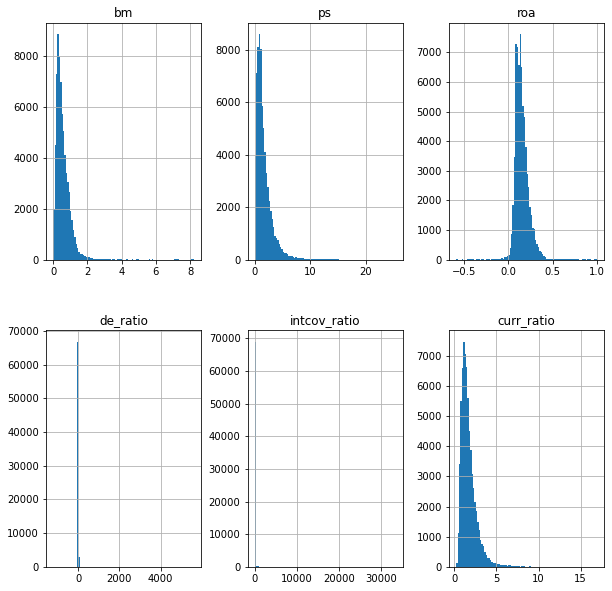

In [259]:
fig, axes = plt.subplots(len(df[features].columns)//3, 3, figsize=(10, 10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df[features].hist(column = df[features].columns[i], bins = 100, ax=axis)
        i = i+1

In [260]:
df[features].describe()

,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield
count,69795.000000,69795.000000,69795.000000,69795.000000,69795.000000,69795.000000,69795.000000
mean,0.554304,1.659345,0.152871,2.753446,37.324819,1.693091,0.023525
std,0.399815,1.450522,0.077155,45.668288,508.406840,0.990663,0.017827
min,0.001000,0.012000,-0.586000,-1228.100000,-81.876000,0.198000,0.000230
25%,0.283000,0.719500,0.101000,1.053000,3.385000,1.052000,0.011400
50%,0.460000,1.246000,0.141000,1.592000,7.000000,1.462000,0.020200
75%,0.739000,2.159000,0.190000,2.465000,14.064000,2.061000,0.031700
max,8.229000,25.332000,0.998000,5628.960000,33468.200000,16.961000,0.615000


In [262]:
df[features]

,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield
0,0.858,0.460,0.138,1.197,3.830,3.023,0.0192
1,0.858,0.618,0.138,1.197,3.830,3.023,0.0143
2,0.858,0.434,0.138,1.197,3.830,3.023,0.0204
3,0.617,0.381,0.141,1.194,3.673,2.991,0.0226
4,0.617,0.351,0.141,1.194,3.673,2.991,0.0245
...,...,...,...,...,...,...,...
298190,0.286,2.356,0.127,1.281,9.113,2.212,0.0128
298191,0.249,2.521,0.128,1.248,9.423,2.216,0.0120
298192,0.249,2.421,0.128,1.248,9.423,2.216,0.0125
298193,0.249,2.410,0.128,1.248,9.423,2.216,0.0126


In [264]:
from scipy import stats
#z score
df = df[(np.abs(stats.zscore(df[features])) < 3).all(axis=1)]

In [268]:
df.target.value_counts()

0.0    43138
1.0    21986
Name: target, dtype: int64

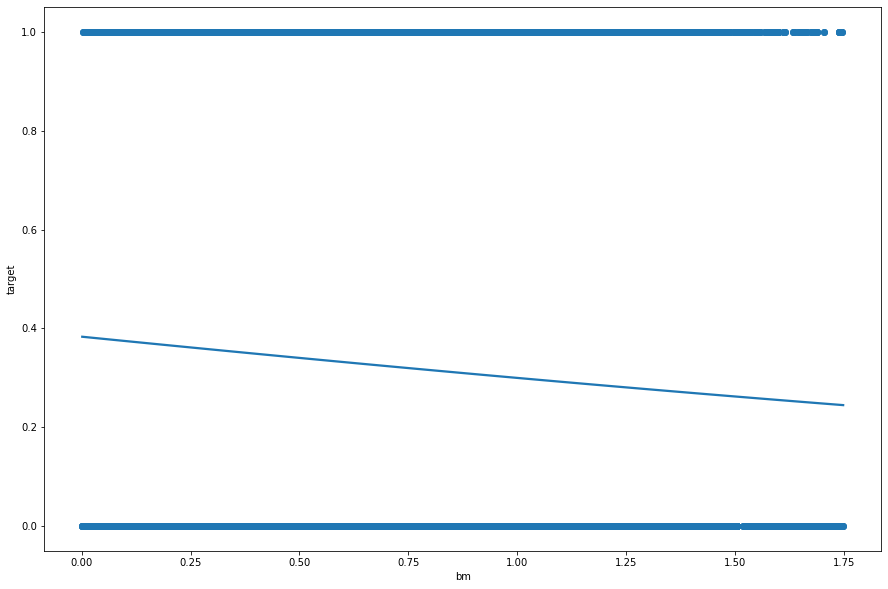

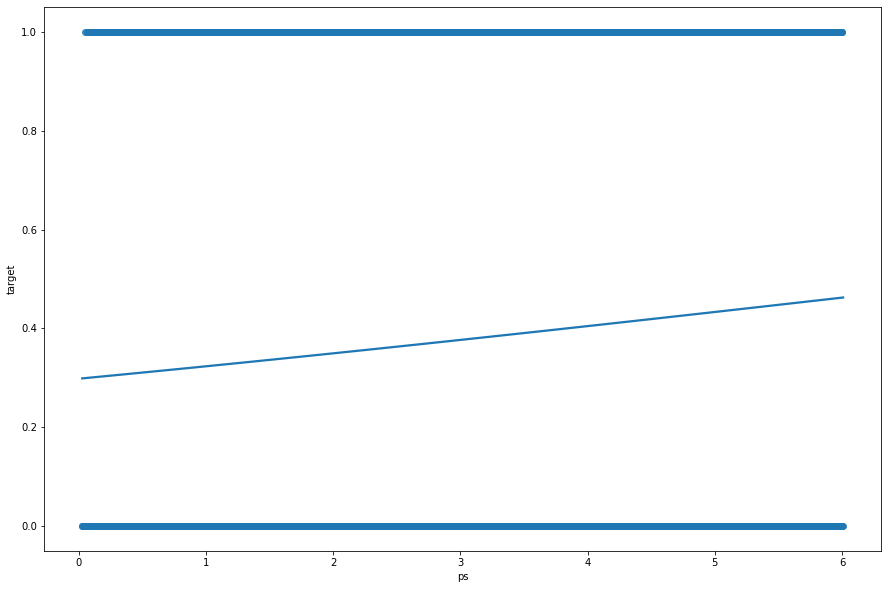

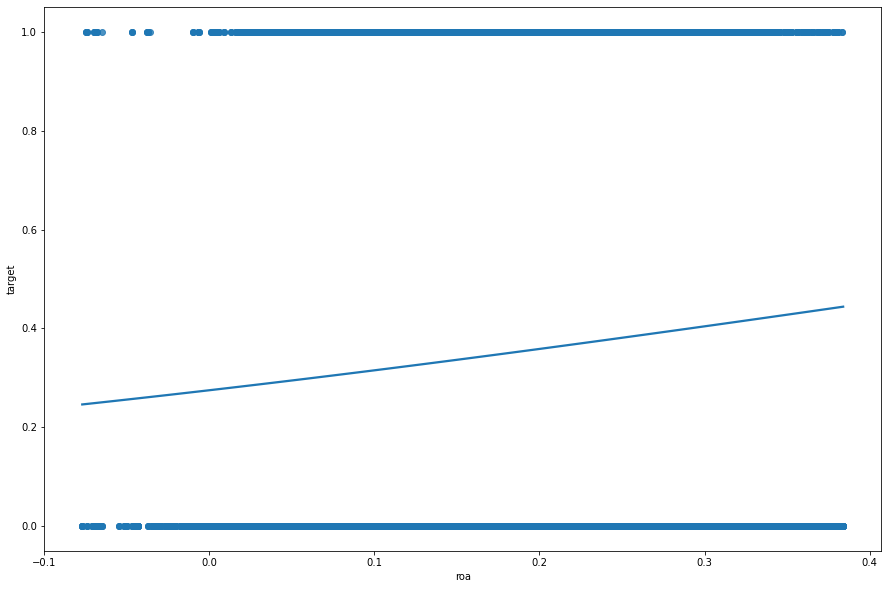

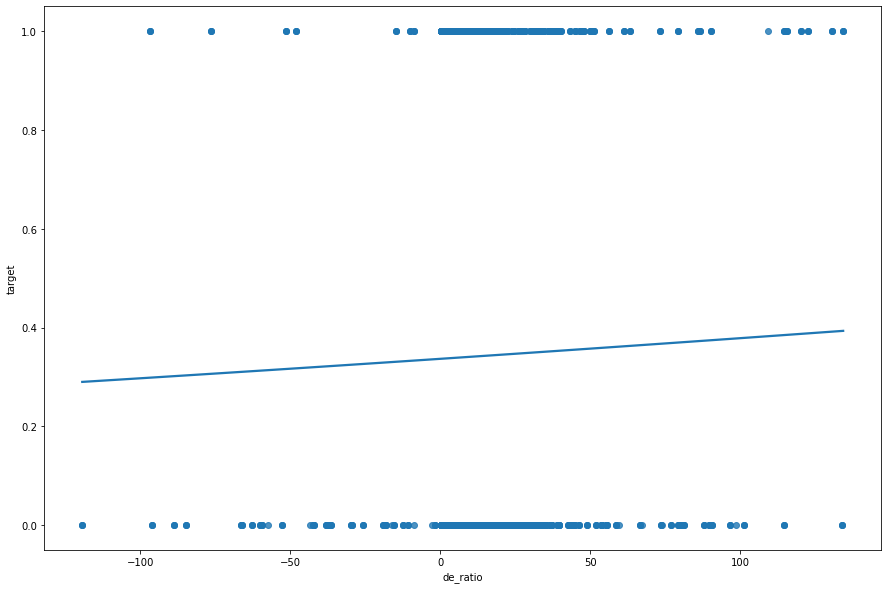

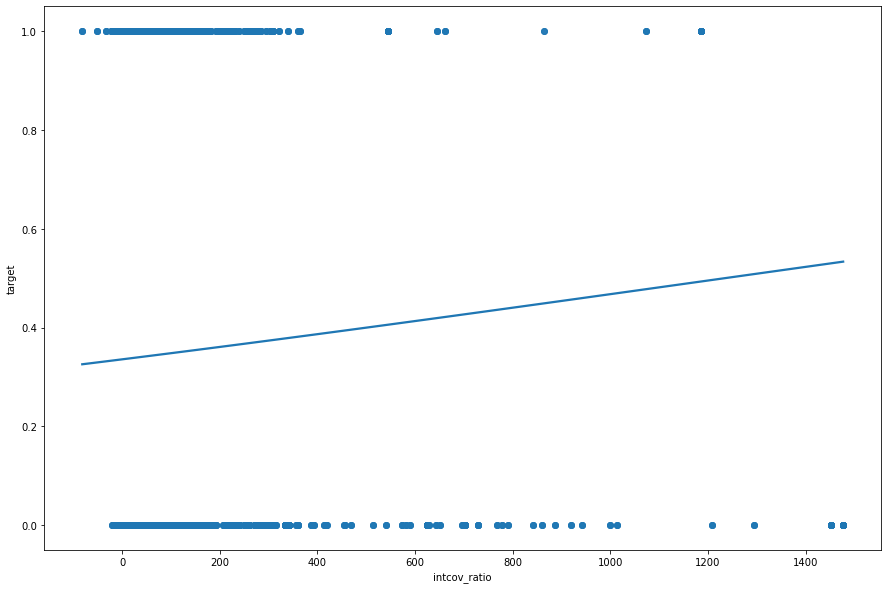

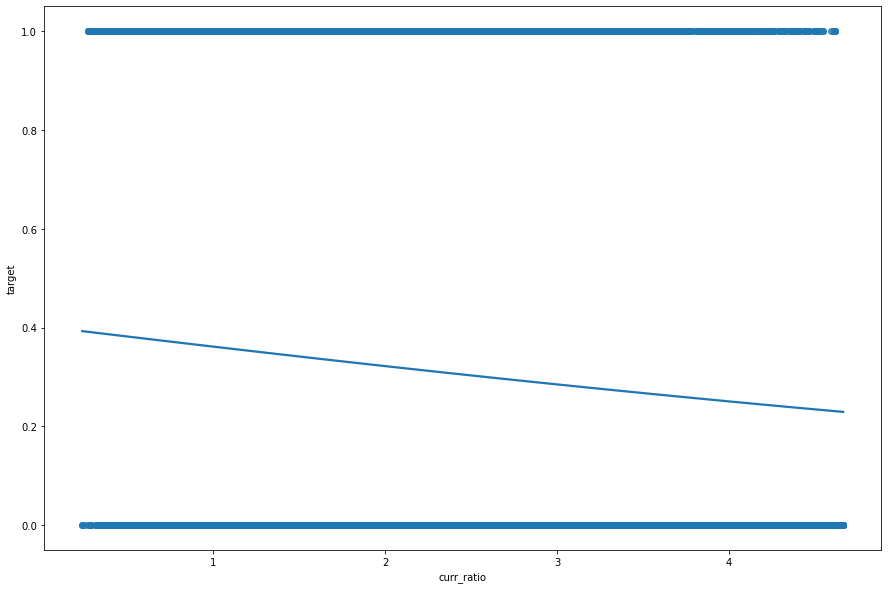

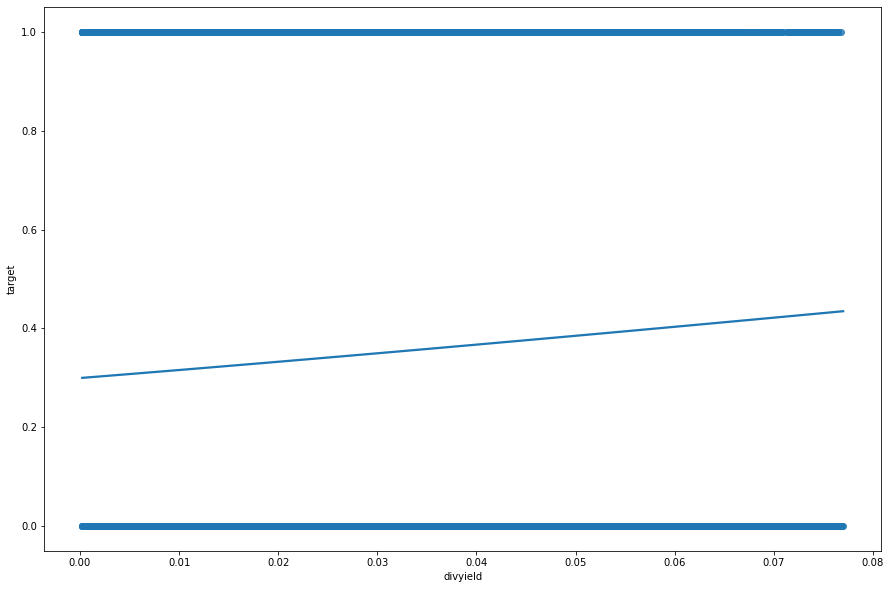

In [305]:

for i in range(len(features)):
    feature = features[i]
    plt.figure(i, figsize=(15, 10))
    sns.regplot(x=feature, y="target", data=df, logistic=True, ci=None)
    plt.show()


In [303]:
df[(df["divyield"] >.07) & (df["target"] == 0)]

,gvkey,splticrm,datadate,conm,TICKER,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,target
523,1075,BBB-,04/30/2009,PINNACLE WEST CAPITAL CORP,PNW,1.496,0.822,0.081,2.372,2.453,0.586,0.0767,0.0
524,1075,BBB-,05/31/2009,PINNACLE WEST CAPITAL CORP,PNW,1.697,0.865,0.079,2.295,2.342,0.732,0.0759,0.0
3366,1440,A-,01/31/2000,AMERICAN ELECTRIC POWER CO,AEP,1.208,0.598,0.155,2.953,2.480,0.729,0.0716,0.0
3372,1440,A-,07/31/2000,AMERICAN ELECTRIC POWER CO,AEP,1.375,0.408,0.159,3.098,2.199,0.700,0.0731,0.0
3396,1440,BBB+,07/31/2002,AMERICAN ELECTRIC POWER CO,AEP,0.903,0.674,0.086,4.904,2.542,0.774,0.0729,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284862,165652,B+,07/31/2016,WESTERN REFINING INC,WNR,0.588,0.213,0.164,2.268,6.862,2.242,0.0729,0.0
289777,177108,B,03/31/2009,CINEMARK HOLDINGS INC,CNK,1.171,0.587,0.107,2.763,1.567,1.745,0.0767,0.0
289782,177108,B+,08/31/2009,CINEMARK HOLDINGS INC,CNK,0.785,0.601,0.117,2.634,2.057,1.817,0.0717,0.0
295734,184748,BB-,07/31/2015,QUAD/GRAPHICS INC,QUAD,1.306,0.120,0.130,2.514,2.177,1.384,0.0729,0.0


In [270]:
X = df[["datadate"] + features]
y = df["target"]

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [272]:
y_train.value_counts()

0.0    34432
1.0    17667
Name: target, dtype: int64

In [273]:
# QUESTION: How to use SMOTE when cross sectional reg'ing. We have a date column

In [274]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)

# y_res.value_counts()

In [275]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [276]:
formula = "target ~ " +  " + ".join(features)

In [277]:
import statsmodels.formula.api as smf

In [278]:
def logit_coef(x,formula):
    date = x.iloc[0]["datadate"]
    model = smf.logit(formula,data=x).fit(disp=0)
    file = "models/logit/" + date + ".pickle"
    model.save(file)
    
    llr_pvalue = pd.Series(model.llr_pvalue, index=["llr_pvalue"])
    prsquared = pd.Series(model.prsquared, index=["prsquared"])
    
    return model.params.append(model.pvalues.add_suffix('_pvalue')).append(prsquared).append(llr_pvalue)#.append(file)

In [279]:
def ols_coef(x,formula):
    date = x.iloc[0]["datadate"]
    model = smf.ols(formula,data=x).fit(disp=0)
    file = "models/ols/" + date + ".pickle"
    model.save(file)
    
    rsquared = pd.Series(model.rsquared, index=["rsquared"])
    rsquared_adj = pd.Series(model.rsquared_adj, index=["rsquared_adj"])
    mse_total = pd.Series(model.mse_total, index=["mse_total"])
    file = pd.Series(file, index=["file"])

    return model.params.append(model.pvalues.add_suffix('_pvalue')).append(rsquared).append(rsquared_adj).append(mse_total).append(file)

In [280]:
df_over = X_over.copy()
df_over["target"] = y_over

In [281]:
df_over["datadate"] = df_over["datadate"].str.replace("/", "_")

In [282]:
df_over

,datadate,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,target
0,02_29_2008,0.437,1.811,0.160,0.711,10.923,3.202,0.0159,1.0
1,05_31_2003,0.201,1.610,0.179,2.898,9.126,1.977,0.0191,0.0
2,11_30_2000,0.793,0.152,0.135,1.693,4.520,2.002,0.0340,0.0
3,01_31_2016,0.381,1.068,0.150,2.024,9.437,1.495,0.0299,0.0
4,12_31_2009,0.164,1.947,0.235,2.593,49.444,1.738,0.0173,1.0
...,...,...,...,...,...,...,...,...,...
68859,01_31_2014,0.482,3.718,0.187,1.382,13.658,1.187,0.0181,1.0
68860,03_31_2000,0.553,0.674,0.185,1.553,6.052,1.424,0.0311,1.0
68861,03_31_2000,0.919,0.987,0.128,3.564,3.195,0.489,0.0729,1.0
68862,05_31_2009,0.732,1.304,0.132,0.755,12.775,2.625,0.0206,1.0


In [284]:
log_reg_df = df_over.groupby('datadate').apply(logit_coef,formula)

In [285]:
ols_reg_df = df_over.groupby('datadate').apply(ols_coef,formula)

In [286]:
log_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,prsquared,llr_pvalue
datadate,,,,,,,,,,,,,,,,,,
01_31_2000,0.358576,-1.222525,0.465119,-1.855864,0.036879,0.002468,-0.173970,13.272875,0.706810,0.046054,0.007095,0.549564,0.387627,0.135744,0.476069,0.176799,0.078558,0.000380
01_31_2001,0.403611,-1.217299,0.138490,-0.095505,0.017311,-0.009373,-0.163851,15.981167,0.615516,0.024851,0.406662,0.971065,0.596530,0.546196,0.469500,0.129000,0.040056,0.073628
01_31_2002,-0.529178,0.167436,0.182093,4.239323,0.019145,0.001227,-0.503107,5.579238,0.481997,0.730363,0.184665,0.075139,0.559668,0.679897,0.032646,0.549549,0.039265,0.064364
01_31_2003,0.608933,-0.585355,0.122242,-1.595320,0.058612,0.008638,-0.279225,10.199687,0.433647,0.285145,0.367538,0.592287,0.160416,0.171311,0.199895,0.297182,0.033770,0.094987
01_31_2004,1.251169,-0.242690,-0.037635,-2.844623,0.024622,0.039886,-0.575163,5.201722,0.090220,0.576512,0.773291,0.303094,0.536177,0.017474,0.007438,0.586795,0.040326,0.015284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,-0.455350,-0.103137,-0.146043,4.944573,-0.077832,0.004180,-0.129659,8.743959,0.529900,0.805966,0.191974,0.028104,0.201912,0.132845,0.351934,0.292799,0.031565,0.017342
12_31_2013,-1.622469,0.462712,0.091900,4.181594,-0.005578,-0.001268,0.159015,14.687754,0.002548,0.233474,0.329524,0.030831,0.700455,0.464988,0.214765,0.087617,0.021159,0.105703
12_31_2014,-0.837294,0.436084,0.079223,3.168228,-0.052039,0.013893,-0.195351,1.737100,0.162293,0.289766,0.402240,0.142918,0.223181,0.010389,0.167222,0.850523,0.034723,0.006033


In [51]:
ols_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,rsquared,rsquared_adj,mse_total,file
datadate,,,,,,,,,,,,,,,,,,,,
01_31_2000,0.975576,-0.375618,0.022827,-1.069001,-0.000078,-0.000212,-0.048830,-0.253788,9.959253e-12,0.000394,0.158562,0.017440,0.987626,0.187929,0.269889,0.747600,0.092599,0.067884,0.245512,models/ols/01_31_2000.pickle
01_31_2001,0.632637,-0.189233,0.055986,0.039619,-0.012954,-0.002456,-0.050841,2.192022,4.137332e-06,0.020263,0.003463,0.923991,0.359585,0.056199,0.089340,0.253322,0.100083,0.077423,0.247736,models/ols/01_31_2001.pickle
01_31_2002,0.641109,-0.004873,0.033482,0.244794,0.009573,0.000241,-0.115236,-2.923246,3.788160e-05,0.947450,0.168537,0.603569,0.153304,0.737844,0.010960,0.152295,0.053825,0.028054,0.250143,models/ols/01_31_2002.pickle
01_31_2003,0.607856,-0.006830,0.036619,0.525203,-0.000346,-0.000762,-0.112248,0.969823,8.841721e-06,0.892245,0.232188,0.235701,0.496917,0.542870,0.005879,0.529882,0.054329,0.030938,0.243157,models/ols/01_31_2003.pickle
01_31_2004,0.645510,-0.094846,0.019750,0.048497,0.007279,0.000328,-0.059348,0.085566,1.179554e-05,0.300196,0.310884,0.918276,0.288041,0.128738,0.106244,0.971505,0.032935,0.010142,0.245837,models/ols/01_31_2004.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,0.483974,-0.003334,-0.028412,0.653852,-0.009993,-0.000234,-0.045919,1.477028,6.399669e-05,0.969963,0.216368,0.148601,0.033056,0.306229,0.052052,0.122349,0.041746,0.025142,0.250018,models/ols/12_31_2012.pickle
12_31_2013,0.363858,0.088392,0.030848,0.162879,-0.001431,-0.000292,-0.012949,0.047863,1.610490e-03,0.311247,0.007998,0.695905,0.363586,0.155621,0.550476,0.981051,0.023814,0.008561,0.248988,models/ols/12_31_2013.pickle
12_31_2014,0.458587,-0.002847,0.012874,0.409992,0.000875,-0.000012,-0.009219,-3.312680,2.514218e-04,0.975689,0.419583,0.366646,0.656238,0.962217,0.730929,0.080082,0.013294,-0.001886,0.248576,models/ols/12_31_2014.pickle


In [52]:
ols_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,rsquared,rsquared_adj,mse_total,file
datadate,,,,,,,,,,,,,,,,,,,,
01_31_2000,0.975576,-0.375618,0.022827,-1.069001,-0.000078,-0.000212,-0.048830,-0.253788,9.959253e-12,0.000394,0.158562,0.017440,0.987626,0.187929,0.269889,0.747600,0.092599,0.067884,0.245512,models/ols/01_31_2000.pickle
01_31_2001,0.632637,-0.189233,0.055986,0.039619,-0.012954,-0.002456,-0.050841,2.192022,4.137332e-06,0.020263,0.003463,0.923991,0.359585,0.056199,0.089340,0.253322,0.100083,0.077423,0.247736,models/ols/01_31_2001.pickle
01_31_2002,0.641109,-0.004873,0.033482,0.244794,0.009573,0.000241,-0.115236,-2.923246,3.788160e-05,0.947450,0.168537,0.603569,0.153304,0.737844,0.010960,0.152295,0.053825,0.028054,0.250143,models/ols/01_31_2002.pickle
01_31_2003,0.607856,-0.006830,0.036619,0.525203,-0.000346,-0.000762,-0.112248,0.969823,8.841721e-06,0.892245,0.232188,0.235701,0.496917,0.542870,0.005879,0.529882,0.054329,0.030938,0.243157,models/ols/01_31_2003.pickle
01_31_2004,0.645510,-0.094846,0.019750,0.048497,0.007279,0.000328,-0.059348,0.085566,1.179554e-05,0.300196,0.310884,0.918276,0.288041,0.128738,0.106244,0.971505,0.032935,0.010142,0.245837,models/ols/01_31_2004.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,0.483974,-0.003334,-0.028412,0.653852,-0.009993,-0.000234,-0.045919,1.477028,6.399669e-05,0.969963,0.216368,0.148601,0.033056,0.306229,0.052052,0.122349,0.041746,0.025142,0.250018,models/ols/12_31_2012.pickle
12_31_2013,0.363858,0.088392,0.030848,0.162879,-0.001431,-0.000292,-0.012949,0.047863,1.610490e-03,0.311247,0.007998,0.695905,0.363586,0.155621,0.550476,0.981051,0.023814,0.008561,0.248988,models/ols/12_31_2013.pickle
12_31_2014,0.458587,-0.002847,0.012874,0.409992,0.000875,-0.000012,-0.009219,-3.312680,2.514218e-04,0.975689,0.419583,0.366646,0.656238,0.962217,0.730929,0.080082,0.013294,-0.001886,0.248576,models/ols/12_31_2014.pickle


In [291]:
import math

def predict_linear_reg(x):
    #print(x["datadate"])
    coeffs = ols_reg_df.loc[x["datadate"]][["Intercept"] + features]
    prediction = coeffs["Intercept"]

    for feature in features:
        prediction += (coeffs[feature] * x[feature])

    pred = pd.Series(prediction, index=["prediction"])
    return pred


def predict_log_reg(x):
    lin_pred = predict_linear_reg(x)
    prob = math.exp(lin_pred[0]) / (1+math.exp(lin_pred[0]))
    print(prob)
    if prob > .5:
        return pd.Series(1, index=["prediction"])
    else:
        return pd.Series(0, index=["prediction"])

In [287]:
import statsmodels.api as sm

def use_saved_model_log(x):
     file = ols_reg_df.loc[x["datadate"]]["file"]
     x_df = x.to_frame().T

     x_df[x_df.columns[1:]] = x_df[x_df.columns[1:]].apply(pd.to_numeric, errors='coerce')
     model = sm.load(file)

     prob = model.predict(x_df)
     if prob.values[0] > .5:
        return pd.Series(1, index=["prediction"])
     else:
        return pd.Series(0, index=["prediction"])
     



In [288]:
X_test["datadate"] = X_test['datadate'].str.replace("/","_")

In [289]:
y_pred = X_test.apply(predict_log_reg, axis=1)

NameError: name 'predict_log_reg' is not defined

In [105]:
y_pred

,prediction
27052,1
90058,1
76332,1
47068,1
218058,1
...,...
246257,1
75343,1
34999,1
94202,1


In [106]:
y_pred.value_counts("prediction")

prediction
1    13883
0       76
dtype: int64

In [290]:
y_pred = X_test.apply(use_saved_model_log, axis=1)

In [292]:
y_pred.value_counts("prediction")

prediction
0    7251
1    5774
dtype: int64

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[5027 3679]
 [2224 2095]]
0.5467946257197697


In [294]:
# QUESTION: Should we also cross section our other classfifers

In [295]:
X_train.drop("datadate", axis=1, inplace=True)
X_test.drop("datadate", axis=1, inplace=True)

In [308]:
from imblearn.over_sampling import SMOTE

# Answer here
smote = SMOTE(random_state=15)
X_res, y_res = smote.fit_resample(X_train, y_train)

y_res.value_counts()

1.0    34432
0.0    34432
Name: target, dtype: int64

In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
clf = RandomForestClassifier()
clf.fit(X_res, y_res)

RandomForestClassifier()

In [299]:
y_pred = clf.predict(X_test)

In [300]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[8602  104]
 [ 122 4197]]
0.9826487523992322


In [67]:
import shap


In [169]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

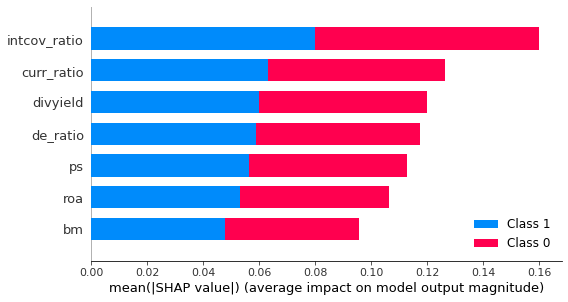

In [170]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [68]:
# log reg
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4616 4664]
 [2029 2650]]
0.5205243928648184


In [69]:
import xgboost as xgb

In [70]:
# xgboost
clf = xgb.XGBClassifier(learning_rate=1.3,n_estimators = 200, max_depth=10)
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[9079  201]
 [ 181 4498]]
0.9726341428469089


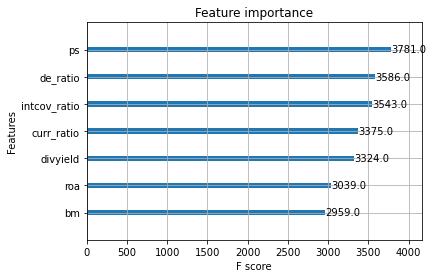

In [188]:
xgb.plot_importance(clf)
plt.show()

In [327]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_res,y_res)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[8485  221]
 [ 199 4120]]
0.9677543186180422


In [323]:
y_test.value_counts()

0.0    8706
1.0    4319
Name: target, dtype: int64

In [316]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
# Will take some time
for i in range(1,50):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_res,y_res)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0, 0.5, 'Error Rate')

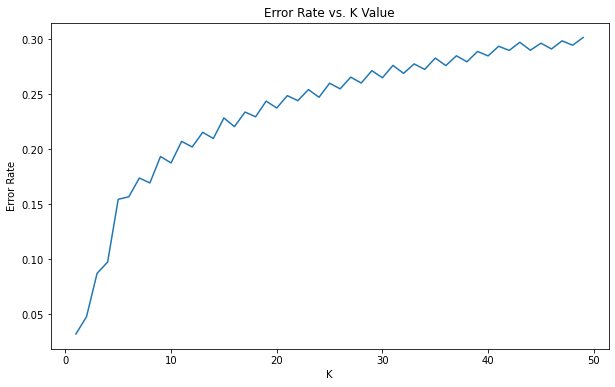

In [318]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# NN

In [67]:
import torch
import pandas as pd

In [68]:
torch.backends.mps.is_available()

True

In [69]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res)

In [115]:
y_train

72829    1.0
33802    0.0
40052    0.0
73694    1.0
21432    1.0
        ... 
39151    1.0
15207    0.0
49584    1.0
63402    1.0
15446    0.0
Name: target, Length: 56050, dtype: float64

In [105]:
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_train.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)



In [120]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv", index_col=None)
y_val = pd.read_csv("y_val.csv", index_col=None)
y_test = pd.read_csv("y_test.csv",index_col=None)

In [122]:
y_train.drop("Unnamed: 0", axis=1,inplace=True)
y_val.drop("Unnamed: 0", axis=1,inplace=True)
y_test.drop("Unnamed: 0", axis=1,inplace=True)

In [123]:
X_train.shape

(56050, 7)

In [124]:
y_train

,target
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
56045,1.0
56046,1.0
56047,1.0
56048,0.0


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [126]:
X_val_norm

array([[0.09273213, 0.04691943, 0.4280303 , ..., 0.00256253, 0.04187795,
        0.08697562],
       [0.04866462, 0.05166693, 0.44759571, ..., 0.00251818, 0.08891034,
        0.04421555],
       [0.04253768, 0.01441548, 0.4760101 , ..., 0.00301552, 0.04671002,
        0.02093466],
       ...,
       [0.01567817, 0.03297788, 0.55176768, ..., 0.00280101, 0.11083935,
        0.02923044],
       [0.06842489, 0.01204581, 0.41287879, ..., 0.00248548, 0.09169003,
        0.02988109],
       [0.03064285, 0.06381516, 0.49179997, ..., 0.00275464, 0.13615814,
        0.04055914]])

In [127]:
X_train_input = torch.tensor(X_train_norm.tolist())
X_val_input = torch.tensor(X_val_norm.tolist())
X_test_input = torch.tensor(X_test_norm.tolist())
y_train_input = torch.tensor(y_train.values.tolist())
y_val_input = torch.tensor(y_val.values.tolist())
y_test_input = torch.tensor(y_test.values.tolist())

In [128]:
y_val_input

tensor([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])

In [129]:
X_train_input

tensor([[0.0796, 0.0272, 0.4514,  ..., 0.0026, 0.1075, 0.0634],
        [0.0376, 0.1031, 0.4975,  ..., 0.0026, 0.0313, 0.1071],
        [0.0134, 0.1815, 0.4951,  ..., 0.0030, 0.0766, 0.0401],
        ...,
        [0.0297, 0.0725, 0.5360,  ..., 0.0031, 0.1016, 0.0907],
        [0.0537, 0.0355, 0.4640,  ..., 0.0026, 0.0678, 0.0476],
        [0.1475, 0.0733, 0.5076,  ..., 0.0028, 0.0514, 0.0200]])

In [130]:
import torch.nn as nn
import torch.nn.functional as F

In [131]:
y_train

,target
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
56045,1.0
56046,1.0
56047,1.0
56048,0.0


In [231]:
NUM_FEATURES = X_train_input.shape[1]
NUM_OUTPUTS = 1 #len(y_train["target"].unique())

In [232]:
class Net(nn.Module):
    def __init__(self, input_size = NUM_FEATURES, hidden_size = 16, output_size = NUM_OUTPUTS, dropout = 0.2, num_layers=2):
        super().__init__()
        self.input_size = input_size #num of features
        self.hidden_size = hidden_size
        self.output_size = output_size    
        self.num_layers = num_layers


        layers = []
        hidden_sizes = []

        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        if num_layers % 2 == 1: #odd

            for i in range(0, int((num_layers-1)/2)): #0,1
                layers.append(nn.Linear(hidden_size*(2**i), hidden_size*(2**(i+1))))
                layers.append(nn.ReLU())
            #2
            layers.append(nn.Linear(hidden_size*(2**(i+1)), hidden_size*(2**(i+1))))
            layers.append(nn.ReLU())

            #3,4
            for i in range(int((num_layers-1)/2), 0, -1):
                layers.append(nn.Linear(hidden_size*(2**(i)), hidden_size*(2**(i-1))))
                layers.append(nn.ReLU())
            
            layers.append(nn.Linear(hidden_size*(2**(i-1)), output_size))
            layers.append(torch.nn.Softmax(dim=1))

        
        else: #even

            for i in range(0, int((num_layers)/2)): #0,1
                layers.append(nn.Linear(hidden_size*(2**i), hidden_size*(2**(i+1))))
                layers.append(nn.ReLU())
        
            #3,4
            for i in range(int((num_layers)/2), 0, -1):
                layers.append(nn.Linear(hidden_size*(2**(i)), hidden_size*(2**(i-1))))
                layers.append(nn.ReLU())
            
            layers.append(nn.Linear(hidden_size*(2**i-1), output_size))
           
        
       
       
        self.layers = nn.Sequential(*layers)
    
    def forward(self,x):
        return torch.sigmoid(self.layers(x))


In [233]:
import torch.utils.tensorboard as tb

In [243]:
from sklearn.metrics import accuracy_score

In [312]:
lr = .001
epochs = 5

hidden_size = 4
num_layer = 2
dropout=.2


model = Net(hidden_size=hidden_size, dropout=dropout, num_layers=num_layer)
print(model)
opt = torch.optim.Adam(model.parameters(),lr=lr)
loss_func = torch.nn.BCELoss()



#log_name = 'nn_hs_' + str(hidden_size) + "_do_" + str(dropout) + "_nl_"+ str(num_layer) + "_lr_" + str(lr) + "_opt_" + opt_text + "_" + datetime.now().strftime("%m-%d-%H%M")


for epoch in range(epochs):
    print("epoch", epoch)
    train_loss_total = 0
    
    model.train()
    y_true_train = []
    y_pred_train = []
    # For each training instance/example
    for i in range (len(X_train_input)):
        X = X_train_input[i]
        y = y_train_input[i]

        out = model(X)
        #print(out)
        loss = loss_func(out,y)
        #print(loss)

        loss.backward()
        opt.step()

        train_loss_total += loss.item()
        
        # PREDICTIONS 
        pred = np.round(out.detach())
        target = np.round(y.detach())           
        y_pred_train.extend(pred.tolist())
        y_true_train.extend(target.tolist())
    
    
    
     # Set the model in evaluation model to not adjust weights
    model.eval()
    # Add validation to tensorboard
  
    val_loss_total = 0
    y_true_val = []
    y_pred_val = []
    # For each validation sample
    for i in range(len(X_val_input)):
        X = X_val_input[i]
        y = y_train_input[i]
    
        out = model(X)
        loss = loss_func(out,y)


        loss.backward()

        val_loss_total += loss.item()
        
        # PREDICTIONS 
        pred = np.round(out.detach())
        target = np.round(y.detach())           
        y_pred_val.extend(pred.tolist())
        y_true_val.extend(target.tolist())
    

    # Get the average loss values
    avg_train_loss = train_loss_total/len(X_train_input)
    avg_val_loss = val_loss_total/len(X_val_input)

    print("Accuracy on training set is" ,accuracy_score(y_true_train,y_pred_train))

    print("Accuracy on val set is" , accuracy_score(y_true_val,y_pred_val))

    print("0 predictions train:", y_pred_train.count(0))
    print("1 predictions train:", y_pred_train.count(1))
    
    print("0 predictions val:", y_pred_val.count(0))
    print("1 predictions val:", y_pred_val.count(1))


    print("Avg Loss on training set is" ,avg_train_loss)
    print("Avg Loss on val set is" ,avg_val_loss)
    

Net(
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4, out_features=1, bias=True)
  )
)
epoch 0
Accuracy on training set is 0.4992506690454951
Accuracy on val set is 0.5018197388139585
0 predictions train: 27628
1 predictions train: 28422
0 predictions val: 0
1 predictions val: 18684
Avg Loss on training set is 0.7087971658482284
Avg Loss on val set is 0.7131249150610205
epoch 1
Accuracy on training set is 0.5027475468331847
Accuracy on val set is 0.49818026118604153
0 predictions train: 30296
1 predictions train: 25754
0 predictions val: 18684
1 predictions val: 0
Avg Loss on training set is 0.9628335363951235
Avg Loss on val set is 0.7553016266930515
epoch 2
Accuracy on training set is 0.504192685102587
Accuracy on val set is 0.49818026118604153
0 predictions t

KeyboardInterrupt: 

In [230]:
epochs = 40

hidden_sizes = [16]
n_dropouts = [.6]
num_layers = [4]

lrs = [.0001]
opt_texts = ["sgd"]

for hidden_size in hidden_sizes:
    for dropout in n_dropouts:   
        for num_layer in num_layers:
            # Create the model with the specific parameters
            model = Net(hidden_size=hidden_size, dropout=dropout, num_layers=num_layer)
            
            for lr in lrs:
                for opt_text in opt_texts:
                    # Pick optimizer
                    if opt_text == "adam":
                        opt = torch.optim.Adam(model.parameters(),lr=lr)
                    else:
                        opt = torch.optim.SGD(model.parameters(),lr=lr)

                    loss_func = torch.nn.CrossEntropyLoss()
                    
                    # Long name created for tensorboard and to save the model in order to pull again if best
                    log_name = 'reg_hs_' + str(hidden_size) + "_do_" + str(dropout) + "_nl_"+ str(num_layer) + "_lr_" + str(lr) + "_opt_" + opt_text + "_" + datetime.now().strftime("%m-%d-%H%M")
                    
                    # Begin Training
                    for epoch in range(epochs):
                        print("epoch", epoch)
                        train_loss_total = 0
                        
                        # Add to Tensorboard
                        train_logger = tb.SummaryWriter('./writer/' + log_name + '/train', flush_secs = 1)
                        # For each training instance/example
                        for i, (x, y) in enumerate(train_inout_seq):
                            opt.zero_grad()
                            x = x.view(len(x), 1, -1)

                            out = model(x.float())
                            loss = loss_func(out,y.view(-1,1))

                            loss.backward()
                            opt.step()

                            train_loss_total += loss.item()

                        
                        # Set the model in evaluation model to not adjust weights
                        model.eval()
                        # Add validation to tensorboard
                        val_logger = tb.SummaryWriter('./writer/' + log_name + '/val', flush_secs = 1)
                        val_loss_total = 0
                        # For each validation sample
                        for i, (x, y) in enumerate(val_inout_seq):
                            
                            out = model(x.view(len(x), 1, -1).float())
                            loss = loss_func(out,y.view(-1,1))

                            val_loss_total += loss.item()

                        # Get the average loss values
                        avg_train_loss = train_loss_total/len(train_inout_seq)
                        avg_val_loss = val_loss_total/len(val_inout_seq)

                        print(avg_train_loss)
                        print(avg_val_loss)
                        
                        # Add to tensorboard graphs for each epoch
                        train_logger.add_scalar("Loss_train", avg_train_loss, epoch)
                        val_logger.add_scalar("Loss_val", avg_val_loss, epoch)
                    
                    # Save the trained model
                    torch.save(model, "models/%s.pt" % log_name)  


NameError: name 'datetime' is not defined

In [ ]:
5
7 16 32 64 32 16 2

In [89]:
df[df["bm"].isna()]

,gvkey,splticrm,datadate,conm,TICKER,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield


In [73]:
df.isna().sum()

gvkey                0
splticrm             0
datadate             0
conm                 0
TICKER               0
bm              169756
ps              165146
roa             165301
de_ratio        165174
intcov_ratio    176375
curr_ratio      188742
divyield        216081
dtype: int64

In [87]:
df.splticrm.value_counts()

BBB     39925
BBB+    32696
BBB-    29051
A-      26883
A       23238
B       22154
B+      21802
BB-     18772
BB      17988
BB+     16225
A+      14239
B-      13036
AA-      8150
C        7703
AA       4240
D        3350
AAA      2279
CCC+     1930
AA+      1303
CCC       694
CC        263
CCC-      190
SD        125
Name: splticrm, dtype: int64

In [44]:
df["target"] = [np.nan] * len(df)


In [45]:
df

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,1/31/2017,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,NaN
1,1/31/2017,1045,0.231,0.561,0.167,9.525,6.421,AAL,BB-,C,AMERICAN AIRLINES GROUP INC,NaN
2,1/31/2017,1075,0.944,2.473,0.088,2.276,4.137,PNW,A-,A,PINNACLE WEST CAPITAL CORP,NaN
3,1/31/2017,1078,0.334,3.472,0.122,0.916,17.428,ABT,BBB,B,ABBOTT LABORATORIES,NaN
4,1/31/2017,1161,0.060,2.351,-0.006,-14.809,-0.938,AMD,CCC+,B-,ADVANCED MICRO DEVICES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1/31/2017,189517,0.775,0.652,0.143,3.180,1.786,ENVA,B,NaN,ENOVA INTERNATIONAL INC,NaN
883,1/31/2017,191255,0.506,1.312,0.105,1.487,6.640,VAC,BB+,C,MARRIOTT VACATIONS WORLDWIDE,NaN
884,1/31/2017,192255,0.541,1.278,0.100,1.697,2.585,ACHC,B+,B-,ACADIA HEALTHCARE CO INC,NaN
885,1/31/2017,233491,NaN,0.456,0.030,-8.254,-0.701,MX,CCC+,C,MAGNACHIP SEMICONDUCTOR CORP,NaN


In [49]:
df

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,1/31/2017,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,2.0
1,1/31/2017,1045,0.231,0.561,0.167,9.525,6.421,AAL,BB-,C,AMERICAN AIRLINES GROUP INC,2.0
2,1/31/2017,1075,0.944,2.473,0.088,2.276,4.137,PNW,A-,A,PINNACLE WEST CAPITAL CORP,3.0
3,1/31/2017,1078,0.334,3.472,0.122,0.916,17.428,ABT,BBB,B,ABBOTT LABORATORIES,2.0
4,1/31/2017,1161,0.060,2.351,-0.006,-14.809,-0.938,AMD,CCC+,B-,ADVANCED MICRO DEVICES,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1/31/2017,189517,0.775,0.652,0.143,3.180,1.786,ENVA,B,NaN,ENOVA INTERNATIONAL INC,2.0
883,1/31/2017,191255,0.506,1.312,0.105,1.487,6.640,VAC,BB+,C,MARRIOTT VACATIONS WORLDWIDE,2.0
884,1/31/2017,192255,0.541,1.278,0.100,1.697,2.585,ACHC,B+,B-,ACADIA HEALTHCARE CO INC,2.0
885,1/31/2017,233491,NaN,0.456,0.030,-8.254,-0.701,MX,CCC+,C,MAGNACHIP SEMICONDUCTOR CORP,1.0


In [54]:
import datetime as dt

df["public_date"] = pd.to_datetime(df["public_date"])

In [58]:
df.sort_values("public_date")

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,2017-01-31,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,2.0
584,2017-01-31,27914,0.428,0.539,0.117,1.518,13.696,HUM,A-,A-,HUMANA INC,3.0
585,2017-01-31,27928,0.034,6.373,0.333,3.383,32.703,INTU,BBB+,A-,INTUIT INC,2.0
586,2017-01-31,27965,0.219,5.265,0.132,1.728,3.408,MCHP,BB,B+,MICROCHIP TECHNOLOGY INC,2.0
587,2017-01-31,28118,0.773,0.401,0.116,1.399,6.593,FOSL,BB+,C,FOSSIL GROUP INC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,2017-01-31,8606,0.107,0.856,0.123,44.348,6.571,PBI,BBB-,B-,PITNEY BOWES INC,2.0
300,2017-01-31,8762,0.279,3.590,0.136,1.158,23.083,PG,AA-,A-,PROCTER & GAMBLE CO,3.0
301,2017-01-31,8807,1.007,2.011,0.075,2.698,2.093,PNM,BBB+,B+,PNM RESOURCES INC,2.0
290,2017-01-31,8455,0.593,3.172,0.099,2.891,3.272,PPL,A-,B,PPL CORP,3.0


In [34]:
print(A_rating["bm"].mean())
print(B_rating["bm"].mean())
print(C_rating["bm"].mean())

0.4672236842105264
0.6188735632183903
4.3751999999999995


In [35]:
print(A_rating["ps"].mean())
print(B_rating["ps"].mean())
print(C_rating["ps"].mean())

2.965266233766233
2.0912641509433962
2.012833333333333


In [36]:
print(A_rating["roa"].mean())
print(B_rating["roa"].mean())
print(C_rating["roa"].mean())

0.1342272727272728
0.11245417789757411
-0.0635


In [37]:
print(A_rating["de_ratio"].mean())
print(B_rating["de_ratio"].mean())
print(C_rating["de_ratio"].mean())


4.241883116883116
2.1565060728744916
8.914583333333331


In [38]:
print(A_rating["intcov_ratio"].mean())
print(B_rating["intcov_ratio"].mean())
print(C_rating["intcov_ratio"].mean())


16.728914285714275
24.32431966053749
-2.507916666666667
